 Lendo CSVs de: C:\Users\sabri\OneDrive\Documentos\GitHub\MachineLearnig-Classifiacacao\results\metrics
 PROCESSANDO 
[OK] KNN carregado.
[OK] Decision Tree carregado.
[OK] Logistic Regression carregado.
[OK] MLP carregado.
[OK] Naive Bayes carregado.

 TABELA 1: MELHOR CONFIGURAÇÃO POR MODELO


,Modelo,Mean Accuracy,Mean Precision,Mean Recall,Mean F1
0,KNN,0.911969,0.908205,0.911969,0.907737
1,Decision Tree,0.934233,0.935083,0.934233,0.934012
2,Logistic Regression,0.881179,0.872728,0.881179,0.872459
3,MLP,0.895384,0.893130,0.895384,0.891137
4,Naive Bayes,0.813536,0.871054,0.813536,0.829919



 Gráfico salvo em: ../results\figures\comparativo_barras_f1.png


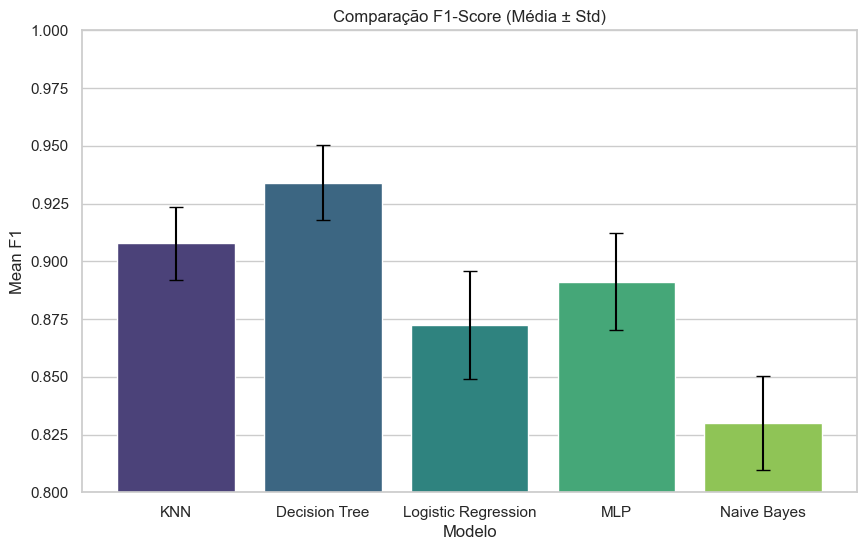

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

if os.path.exists('results/metrics'):
    caminho_base = 'results'
elif os.path.exists('../results/metrics'):
    caminho_base = '../results'
else:
    raise FileNotFoundError("CRÍTICO: Não encontrei a pasta 'results/metrics'. Verifique onde você salvou o notebook!")

caminho_csvs = os.path.join(caminho_base, 'metrics')
caminho_figuras = os.path.join(caminho_base, 'figures')

print(f" Lendo CSVs de: {os.path.abspath(caminho_csvs)}")
os.makedirs(caminho_figuras, exist_ok=True)
sns.set_theme(style="whitegrid")

arquivos = {
    'KNN': 'KNN_results.csv',
    'Decision Tree': 'DecisionTree_results.csv',
    'Logistic Regression': 'LogisticRegression_results.csv',
    'MLP': 'MLP_results.csv',
    'Naive Bayes': 'NaiveBayes_results.csv'
}

melhores_de_cada = []

print(" PROCESSANDO ")

for modelo, arquivo in arquivos.items():
    path_completo = os.path.join(caminho_csvs, arquivo)

    if os.path.exists(path_completo):
        df = pd.read_csv(path_completo)
        if 'Mean F1' in df.columns:
            df = df.sort_values(by='Mean F1', ascending=False)
            melhor_config = df.iloc[0].to_dict()
            melhor_config['Modelo'] = modelo
            melhores_de_cada.append(melhor_config)
            print(f"[OK] {modelo} carregado.")
        else:
            print(f"[PULAR] {modelo}: Arquivo sem coluna 'Mean F1'.")
    else:
        print(f"[ERRO] Arquivo não encontrado: {arquivo}")
if not melhores_de_cada:
    print("\n Nenhum dado foi carregado. A lista está vazia.")
    print("Verifique se os arquivos CSV estão realmente dentro da pasta 'results/metrics'.")
else:
    df_geral = pd.DataFrame(melhores_de_cada)

    cols = ['Modelo'] + [c for c in df_geral.columns if c != 'Modelo']
    df_geral = df_geral[cols]

    print("\n" + "="*60)
    print(" TABELA 1: MELHOR CONFIGURAÇÃO POR MODELO")
    cols_visual = ['Modelo', 'Mean Accuracy', 'Mean Precision', 'Mean Recall', 'Mean F1']

    try:
        display(df_geral[cols_visual])
    except:
        print(df_geral[cols_visual].to_string(index=False))
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_geral, x='Modelo', y='Mean F1', hue='Modelo', palette='viridis')
    plt.errorbar(x=range(len(df_geral)), y=df_geral['Mean F1'], yerr=df_geral['Std F1'], fmt='none', c='black', capsize=5)
    plt.title('Comparação F1-Score (Média ± Std)')
    plt.ylim(0.8, 1.0) # Ajuste de zoom

    save_path = os.path.join(caminho_figuras, 'comparativo_barras_f1.png')
    plt.savefig(save_path)
    print(f"\n Gráfico salvo em: {save_path}")
    plt.show()